In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
music_sales_df = pd.read_csv('../data/Usable_Data/Usable_Music_Sales_Data.csv')

## Exploring and Analyzing Volume data. 

In this notebook, I will create a filter to only Analyze data that pertains to music sales in terms of _volume_. I will create visuals to look at volume trends from 1973 to 2019. I will also look at these trends in terms of "Mode", so looking at sales volumes specifically from formats that are Analog, Digital, and Streaming.

In [3]:
music_sales_df.shape

(900, 5)

#### The Metric column indicates whether the data corresponds to sales in terms of volume (Units) or revenue (Value Adjusted for Inflation). So for volume we're going to focus only on the rows with 'Units' under the Metric column. 

#### In this case, the values in Actual_Value represent units sold.

In [4]:
volume_df = music_sales_df[music_sales_df['Metric']=='Units']

In [5]:
volume_df

,Format,Metric,Year,Actual_Value,Mode
0,CD,Units,1983,0.800000,Digital
1,CD,Units,1984,5.800000,Digital
2,CD,Units,1985,22.600000,Digital
3,CD,Units,1986,53.000000,Digital
4,CD,Units,1987,102.100000,Digital
...,...,...,...,...,...
459,Paid Subscriptions,Units,2015,10.840000,Streaming
460,Paid Subscriptions,Units,2016,22.680000,Streaming
461,Paid Subscriptions,Units,2017,35.273501,Streaming
462,Paid Subscriptions,Units,2018,46.911323,Streaming


In [6]:
volume_df['Metric'].unique()

array(['Units'], dtype=object)

#### Just double checking everything is in terms of 'Units' in the volume data frame.

In [7]:
volume_df['Format'].unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions'], dtype=object)

#### First we'll see how sales volume has changed throughout the years with a visual

In [8]:
volume_df = volume_df.astype({"Year":'str'})

In [9]:
volume_by_year = volume_df.groupby(['Year','Metric'])['Actual_Value'].sum()

<AxesSubplot:title={'center':'U.S. Recorded Music Sales Volumes'}, xlabel='Year', ylabel='Units (Millions)'>

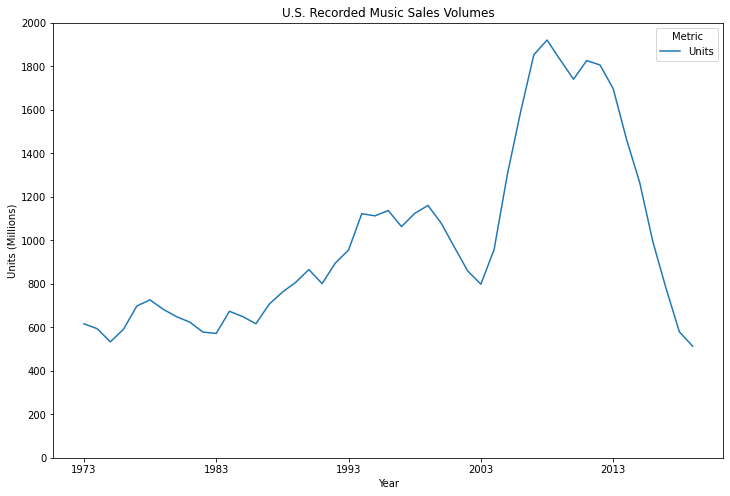

In [10]:
volume_by_year.unstack().plot(yticks=(0,200,400,600,800,1000,1200,1400,1600,1800,2000), figsize=(12,8),
                             title=("U.S. Recorded Music Sales Volumes"),ylabel=("Units (Millions)"),
                              xlabel=("Year"))


In [11]:
volume_df['Year'].unique()

array(['1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982'],
      dtype=object)

[Text(0, 0, '1973'),
 Text(1, 0, '1974'),
 Text(2, 0, '1975'),
 Text(3, 0, '1976'),
 Text(4, 0, '1977'),
 Text(5, 0, '1978'),
 Text(6, 0, '1979'),
 Text(7, 0, '1980'),
 Text(8, 0, '1981'),
 Text(9, 0, '1982'),
 Text(10, 0, '1983'),
 Text(11, 0, '1984'),
 Text(12, 0, '1985'),
 Text(13, 0, '1986'),
 Text(14, 0, '1987'),
 Text(15, 0, '1988'),
 Text(16, 0, '1989'),
 Text(17, 0, '1990'),
 Text(18, 0, '1991'),
 Text(19, 0, '1992'),
 Text(20, 0, '1993'),
 Text(21, 0, '1994'),
 Text(22, 0, '1995'),
 Text(23, 0, '1996'),
 Text(24, 0, '1997'),
 Text(25, 0, '1998'),
 Text(26, 0, '1999'),
 Text(27, 0, '2000'),
 Text(28, 0, '2001'),
 Text(29, 0, '2002'),
 Text(30, 0, '2003'),
 Text(31, 0, '2004'),
 Text(32, 0, '2005'),
 Text(33, 0, '2006'),
 Text(34, 0, '2007'),
 Text(35, 0, '2008'),
 Text(36, 0, '2009'),
 Text(37, 0, '2010'),
 Text(38, 0, '2011'),
 Text(39, 0, '2012'),
 Text(40, 0, '2013'),
 Text(41, 0, '2014'),
 Text(42, 0, '2015'),
 Text(43, 0, '2016'),
 Text(44, 0, '2017'),
 Text(45, 0, '2018')

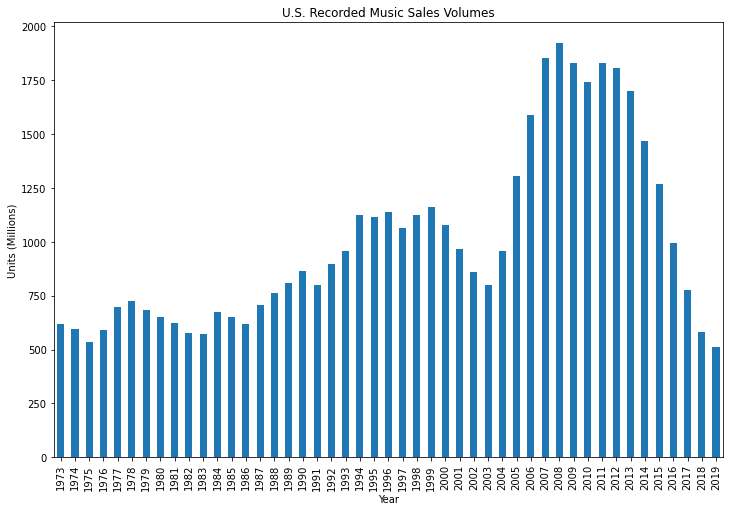

In [12]:
ax = volume_by_year.plot(kind='bar',figsize=(12,8),title=("U.S. Recorded Music Sales Volumes"),
                         ylabel=("Units (Millions)"),xlabel=("Year"))

ax.set_xticklabels(['1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'])

#### The plot makes it easy to visualize trends throughout the years, whereas the bar graph makes it easier to see how Units Sold (Volume) has actually changed throughout the years.

In [13]:
digital_df = volume_df[volume_df['Mode']=='Digital']

In [14]:
digital_df.head(5)

,Format,Metric,Year,Actual_Value,Mode
0,CD,Units,1983,0.8,Digital
1,CD,Units,1984,5.8,Digital
2,CD,Units,1985,22.6,Digital
3,CD,Units,1986,53.0,Digital
4,CD,Units,1987,102.1,Digital


In [15]:
digital_downloads_df = volume_df[volume_df['Format']=='Download Album']

In [16]:
digital_downloads_df.head(5)

,Format,Metric,Year,Actual_Value,Mode
388,Download Album,Units,2004,4.6,Digital
389,Download Album,Units,2005,13.6,Digital
390,Download Album,Units,2006,27.6,Digital
391,Download Album,Units,2007,49.8,Digital
392,Download Album,Units,2008,63.6,Digital


In [17]:
digital_single_df = volume_df[volume_df['Format']=="Download Single"]

In [18]:
digital_single_df.head(5)

,Format,Metric,Year,Actual_Value,Mode
372,Download Single,Units,2004,139.4,Digital
373,Download Single,Units,2005,366.9,Digital
374,Download Single,Units,2006,586.4,Digital
375,Download Single,Units,2007,819.4,Digital
376,Download Single,Units,2008,1042.7,Digital


Just wanted to see when Digital formats were introduced.

#### By the digital data frame it is clear that Digital was introduced in 1983. Seeing the plots above, we can see that once digital CDs were introduced in 1983, sales volume began to rise. Sales were at their highest in the early 2000s, which is when digital downloads became popular and music became more accessible. Volume began to steadily decline in the 2010s, likely due to the rising popularity of streaming services (and perhaps other issues such as piracy which became easier with digital downloads). In 2019, sales volume was at the lowest it has ever been since 1973.

#### Now, we will look at how sales volume has changed based on Mode: Digital, Analog, or Streaming. Streaming should be relatively insignificant in this df as a lot of streaming isn't considered in sales volume. 

In [19]:
volume_by_mode = volume_df.groupby(['Year','Mode'])['Actual_Value'].sum()

<AxesSubplot:title={'center':'U.S. Recorded Music Sales Volumes by Mode'}, xlabel='Year', ylabel='Units (Millions)'>

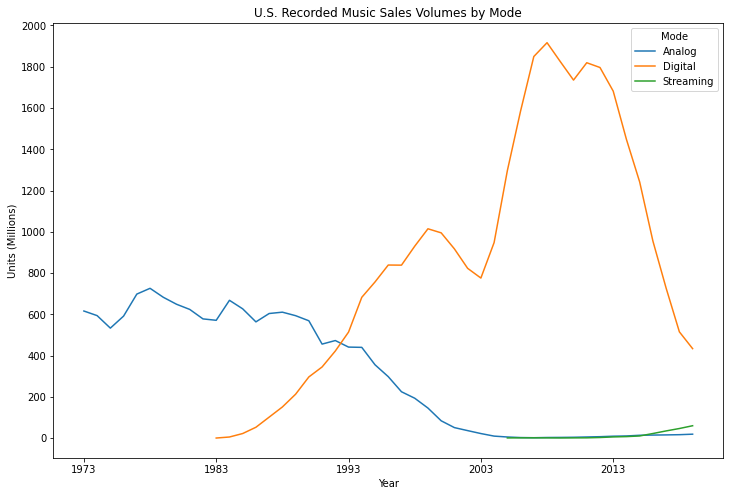

In [20]:
volume_by_mode.unstack().plot(yticks=(0,200,400,600,800,1000,1200,1400,1600,1800,2000), figsize=(12,8),
                             title=("U.S. Recorded Music Sales Volumes by Mode"), ylabel=("Units (Millions)"))


## With the plot above, we can see that digital is what caused a rise in volume sales, which spiked even more with the availability of digital downloads. This is presumably because music became easily available to people. However, sales have been dropping as streaming becomes the norm rather than digital downloads.